In [36]:
import mne
import numpy as np # MUST USE Version: 1.26.4 for MNE
import matplotlib.pyplot as plt
import os
import pandas as pd

data_path = 'BCICIV_2a_gdf'
subject_files = [
    'A01T.gdf', 
    'A02T.gdf', 'A03T.gdf', 'A04T.gdf', 'A05T.gdf',
    'A06T.gdf', 'A07T.gdf', 'A08T.gdf', 'A09T.gdf'
]

file_paths = [os.path.join(data_path, fname) for fname in subject_files]
processed_raw_list = []

In [37]:
print("Current numpy Version:", np.__version__)


Current numpy Version: 1.26.4


In [38]:
verb = False
for file in file_paths:
    print(f"\nProcessing {file}...")

    # Nyers adat betöltése
    raw = mne.io.read_raw_gdf(file, preload=True, verbose=verb)

    # Set channel types: EEG and EOG
    channel_types = {ch: 'eeg' for ch in raw.ch_names}
    eog_channels = [ch for ch in raw.ch_names if 'EOG' in ch]
    for ch in eog_channels:
        channel_types[ch] = 'eog'
    raw.set_channel_types(channel_types, verbose=verb)

    # Check types
    for name, ch_type in zip(raw.ch_names, raw.get_channel_types()):
        # print(f'Channel: {name} ({ch_type})')
        pass

    # Apply a band-pass filter o nEEG
    raw.filter(7., 30., picks='eeg')
    
    # independent component analysis
    ica = mne.preprocessing.ICA(n_components=15, random_state=97, max_iter='auto', verbose=verb)
    ica.fit(raw, verbose=verb)

    # EOG adatok használata artifacts-ek eltüntetésére
    eog_indices, eog_scores = ica.find_bads_eog(raw, verbose=verb)
    ica.exclude = eog_indices
    print(f"  Excluding ICA components: {ica.exclude}")

    # Apply ICA to remove artifacts
    ica.apply(raw, verbose=verb)
    
    # Append the cleaned raw data to the list
    processed_raw_list.append(raw)

raw_concat = mne.concatenate_raws(processed_raw_list)


Processing BCICIV_2a_gdf\A01T.gdf...


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


  Excluding ICA components: [0]

Processing BCICIV_2a_gdf\A02T.gdf...


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


  Excluding ICA components: [0, 1]

Processing BCICIV_2a_gdf\A03T.gdf...


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


  Excluding ICA components: [0]

Processing BCICIV_2a_gdf\A04T.gdf...


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


  Excluding ICA components: [0]

Processing BCICIV_2a_gdf\A05T.gdf...


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


  Excluding ICA components: [0, 10]

Processing BCICIV_2a_gdf\A06T.gdf...


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


  Excluding ICA components: [0]

Processing BCICIV_2a_gdf\A07T.gdf...


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


  Excluding ICA components: [0]

Processing BCICIV_2a_gdf\A08T.gdf...


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


  Excluding ICA components: [0]

Processing BCICIV_2a_gdf\A09T.gdf...


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


  Excluding ICA components: [0]


In [39]:
# MNE által létrehozott event id remap:
event_id = {'1023': 1, '1072': 2, '276': 3, '277': 4, '32766': 5, '768': 6, '769': 7, '770': 8, '771': 9, '772': 10}
# Cikkben szereplő releváns  események:
event_dict = {
    'left_hand': event_id['769'],   # 7
    'right_hand': event_id['770'],  # 8
    'feet': event_id['771'],        # 9
    'tongue': event_id['772']       # 10
}

# Eseménykódok és hossz (4 mp) a dataset dokuemntáció szerint:
tmin = -0.2
tmax = 4
events, event_id = mne.events_from_annotations(raw_concat)

# EOG adatok elvetése, csak szemmozgás általi zaj szűrésére használtuk:
picks = mne.pick_types(raw_concat.info, eeg=True, exclude='bads')

epochs = mne.Epochs(raw_concat, events, event_id=event_dict, tmin=tmin, tmax=tmax,
                    picks=picks, baseline=(tmin,0), preload=True) # baseline correction

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
2592 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2592 events and 1051 original time points ...
0 bad epochs dropped


In [40]:
# Események előfordulása
event_ids = events[:, 2]
event_counts = pd.Series(event_ids).value_counts().sort_index()

print("Event Counts:")
for event_code, count in event_counts.items():
    description = [desc for desc, id_ in event_id.items() if id_ == event_code]
    description = description[0] if description else 'Unknown'
    print(f"Event ID {event_code} ({description}): {count} occurrences")

Event Counts:
Event ID 1 (1023): 264 occurrences
Event ID 2 (1072): 9 occurrences
Event ID 3 (276): 8 occurrences
Event ID 4 (277): 8 occurrences
Event ID 5 (32766): 79 occurrences
Event ID 6 (768): 2592 occurrences
Event ID 7 (769): 648 occurrences
Event ID 8 (770): 648 occurrences
Event ID 9 (771): 648 occurrences
Event ID 10 (772): 648 occurrences


In [41]:
# Előkészíés EEGnet-hez:
print(f"Unique event IDs in the dataset: {np.unique(events[:, 2])}")
events, event_id = mne.events_from_annotations(raw_concat)

print("Event ID Mapping:", event_id)

X = epochs.get_data()  # Shape: (n_epochs, n_channels, n_times)
y = epochs.events[:, -1]  # Event IDs corresponding to each epoch

# Per channel normalization for 3D data
for ch in range(X.shape[1]):
    mean = X[:,ch,:].mean()
    std = X[:,ch,:].std()
    X[:,ch,:] = (X[:,ch,:] - mean) / std

# Encode labels to start from 0
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)  # 0, 1, 2, 3

# Ellenőrzés:
print("Encoded Labels:", le.classes_)
print("Unique transformed labels in y:", np.unique(y))
print(f"Data shape (X): {X.shape}")
print(f"Labels shape (y): {y.shape}")

Unique event IDs in the dataset: [ 1  2  3  4  5  6  7  8  9 10]
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Event ID Mapping: {'1023': 1, '1072': 2, '276': 3, '277': 4, '32766': 5, '768': 6, '769': 7, '770': 8, '771': 9, '772': 10}
Encoded Labels: [ 7  8  9 10]
Unique transformed labels in y: [0 1 2 3]
Data shape (X): (2592, 22, 1051)
Labels shape (y): (2592,)


In [42]:
# Add EEGModels to Python path
import sys
sys.path.append('./arl-eegmodels/')

# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from EEGModels import EEGNet


In [43]:
# Add singleton dimension
X = X[..., np.newaxis]  # New shape: (n_samples, n_channels, n_times, 1)
print(f"Data shape after adding singleton dimension: {X.shape}")

# Split into tratrain,val,test (70%-15%-15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split( # 15% test, 15% validation
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

# Model parameters
nb_classes = y_train_cat.shape[1]  # Number of classes
Chans = X_train.shape[1]           # Number of channels
Samples = X_train.shape[2]         # Number of time points

print(f"Number of classes: {nb_classes}")
print(f"Channels: {Chans}")
print(f"Samples per epoch: {Samples}")


Data shape after adding singleton dimension: (2592, 22, 1051, 1)
Training samples: 1814
Validation samples: 389
Test samples: 389
Number of classes: 4
Channels: 22
Samples per epoch: 1051


In [44]:
# Compute class weights to balance them
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {i: class_weights_array[i] for i in range(len(class_weights_array))}
print(f"Class weights: {class_weights_dict}")


Class weights: {0: 1.0011037527593818, 1: 0.998898678414097, 2: 1.0011037527593818, 3: 0.998898678414097}


In [45]:
############################## MODEL TRAINING

In [46]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_AUC',
    patience=20,
    restore_best_weights=True,
    mode='max'
)

from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                             factor=0.5,
                             patience=8,
                             min_lr=0.00001)

In [ ]:
print("\nTraining EEGNet Model with Class Weights")

# Initialize the EEGNet model
model = EEGNet(nb_classes=nb_classes, Chans=Chans, Samples=Samples,
               dropoutRate=0.4, kernLength=64, F1=16, D=2, F2=32,
               dropoutType='Dropout')

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy', AUC(name='AUC', multi_label=True)])

# Train the model
history = model.fit(
    X_train, y_train_cat,
    batch_size=8,
    epochs=200,
    verbose=2,
    validation_data=(X_val, y_val_cat),
    class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr]
)



Training EEGNet Model with Class Weights


C:\Users\Guszti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
227/227 - 9s - 41ms/step - AUC: 0.5634 - accuracy: 0.2988 - loss: 1.3701 - val_AUC: 0.5949 - val_accuracy: 0.3522 - val_loss: 1.3535 - learning_rate: 0.0010
Epoch 2/300
227/227 - 8s - 35ms/step - AUC: 0.6528 - accuracy: 0.3820 - loss: 1.2982 - val_AUC: 0.6772 - val_accuracy: 0.4524 - val_loss: 1.2873 - learning_rate: 0.0010
Epoch 3/300
227/227 - 8s - 35ms/step - AUC: 0.6721 - accuracy: 0.3931 - loss: 1.2653 - val_AUC: 0.6627 - val_accuracy: 0.3907 - val_loss: 1.2787 - learning_rate: 0.0010
Epoch 4/300
227/227 - 8s - 35ms/step - AUC: 0.6832 - accuracy: 0.4123 - loss: 1.2500 - val_AUC: 0.6922 - val_accuracy: 0.4679 - val_loss: 1.2469 - learning_rate: 0.0010
Epoch 5/300
227/227 - 8s - 35ms/step - AUC: 0.7018 - accuracy: 0.4245 - loss: 1.2159 - val_AUC: 0.7233 - val_accuracy: 0.4499 - val_loss: 1.2109 - learning_rate: 0.0010
Epoch 6/300
227/227 - 8s - 35ms/step - AUC: 0.6931 - accuracy: 0.4195 - loss: 1.2297 - val_AUC: 0.7173 - val_accuracy: 0.4524 - val_loss: 1.2185 - learning

In [48]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test_cat, verbose=0)
print('\nTest Loss:', score[0])
print('Test Accuracy:', score[1])
print('Test AUC:', score[2])
model.save('24-12-05_0-16-32size_7-30hz-ICA-newParams-NORMALIZED.keras')



Test Loss: 0.8853705525398254
Test Accuracy: 0.6349614262580872
Test AUC: 0.8641985654830933


In [49]:
# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Map encoded labels to event names
event_labels = {
    7: 'left_hand',
    8: 'right_hand',
    9: 'feet',
    10: 'tongue'
}
label_names = [event_labels[cls] for cls in le.classes_]

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_names))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))

# AUC Score
from sklearn.preprocessing import label_binarize

# Binarize the labels for AUC computation
y_test_binarized = label_binarize(y_true_classes, classes=np.arange(nb_classes))
y_pred_binarized = y_pred

auc_score = roc_auc_score(y_test_binarized, y_pred_binarized, average='macro', multi_class='ovr')
print('Test AUC:', auc_score)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step

Classification Report:
              precision    recall  f1-score   support

   left_hand       0.62      0.70      0.66        98
  right_hand       0.65      0.75      0.70        97
        feet       0.63      0.61      0.62        97
      tongue       0.65      0.47      0.55        97

    accuracy                           0.63       389
   macro avg       0.64      0.63      0.63       389
weighted avg       0.64      0.63      0.63       389

Confusion Matrix:
[[69 14  2 13]
 [12 73  9  3]
 [15 14 59  9]
 [16 12 23 46]]
Test AUC: 0.8643703279927986


In [50]:
def print_history_values(history):
    print("Epoch-wise Training and Validation Metrics:")
    print("="*50)
    for epoch in range(len(history.history['loss'])):
        train_loss = history.history['loss'][epoch]
        val_loss = history.history['val_loss'][epoch]
        train_accuracy = history.history['accuracy'][epoch]
        val_accuracy = history.history['val_accuracy'][epoch]
        
        print(f"Epoch {epoch + 1}:")
        print(f"  - Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
        print(f"  - Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
    print("="*50)

print_history_values(history)


Epoch-wise Training and Validation Metrics:
Epoch 1:
  - Train Loss: 1.3701, Train Accuracy: 0.2988
  - Val Loss: 1.3535, Val Accuracy: 0.3522
Epoch 2:
  - Train Loss: 1.2982, Train Accuracy: 0.3820
  - Val Loss: 1.2873, Val Accuracy: 0.4524
Epoch 3:
  - Train Loss: 1.2653, Train Accuracy: 0.3931
  - Val Loss: 1.2787, Val Accuracy: 0.3907
Epoch 4:
  - Train Loss: 1.2500, Train Accuracy: 0.4123
  - Val Loss: 1.2469, Val Accuracy: 0.4679
Epoch 5:
  - Train Loss: 1.2159, Train Accuracy: 0.4245
  - Val Loss: 1.2109, Val Accuracy: 0.4499
Epoch 6:
  - Train Loss: 1.2297, Train Accuracy: 0.4195
  - Val Loss: 1.2185, Val Accuracy: 0.4524
Epoch 7:
  - Train Loss: 1.1969, Train Accuracy: 0.4515
  - Val Loss: 1.2056, Val Accuracy: 0.4653
Epoch 8:
  - Train Loss: 1.2012, Train Accuracy: 0.4405
  - Val Loss: 1.2233, Val Accuracy: 0.4499
Epoch 9:
  - Train Loss: 1.2041, Train Accuracy: 0.4471
  - Val Loss: 1.1970, Val Accuracy: 0.4859
Epoch 10:
  - Train Loss: 1.1996, Train Accuracy: 0.4465
  - Val 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


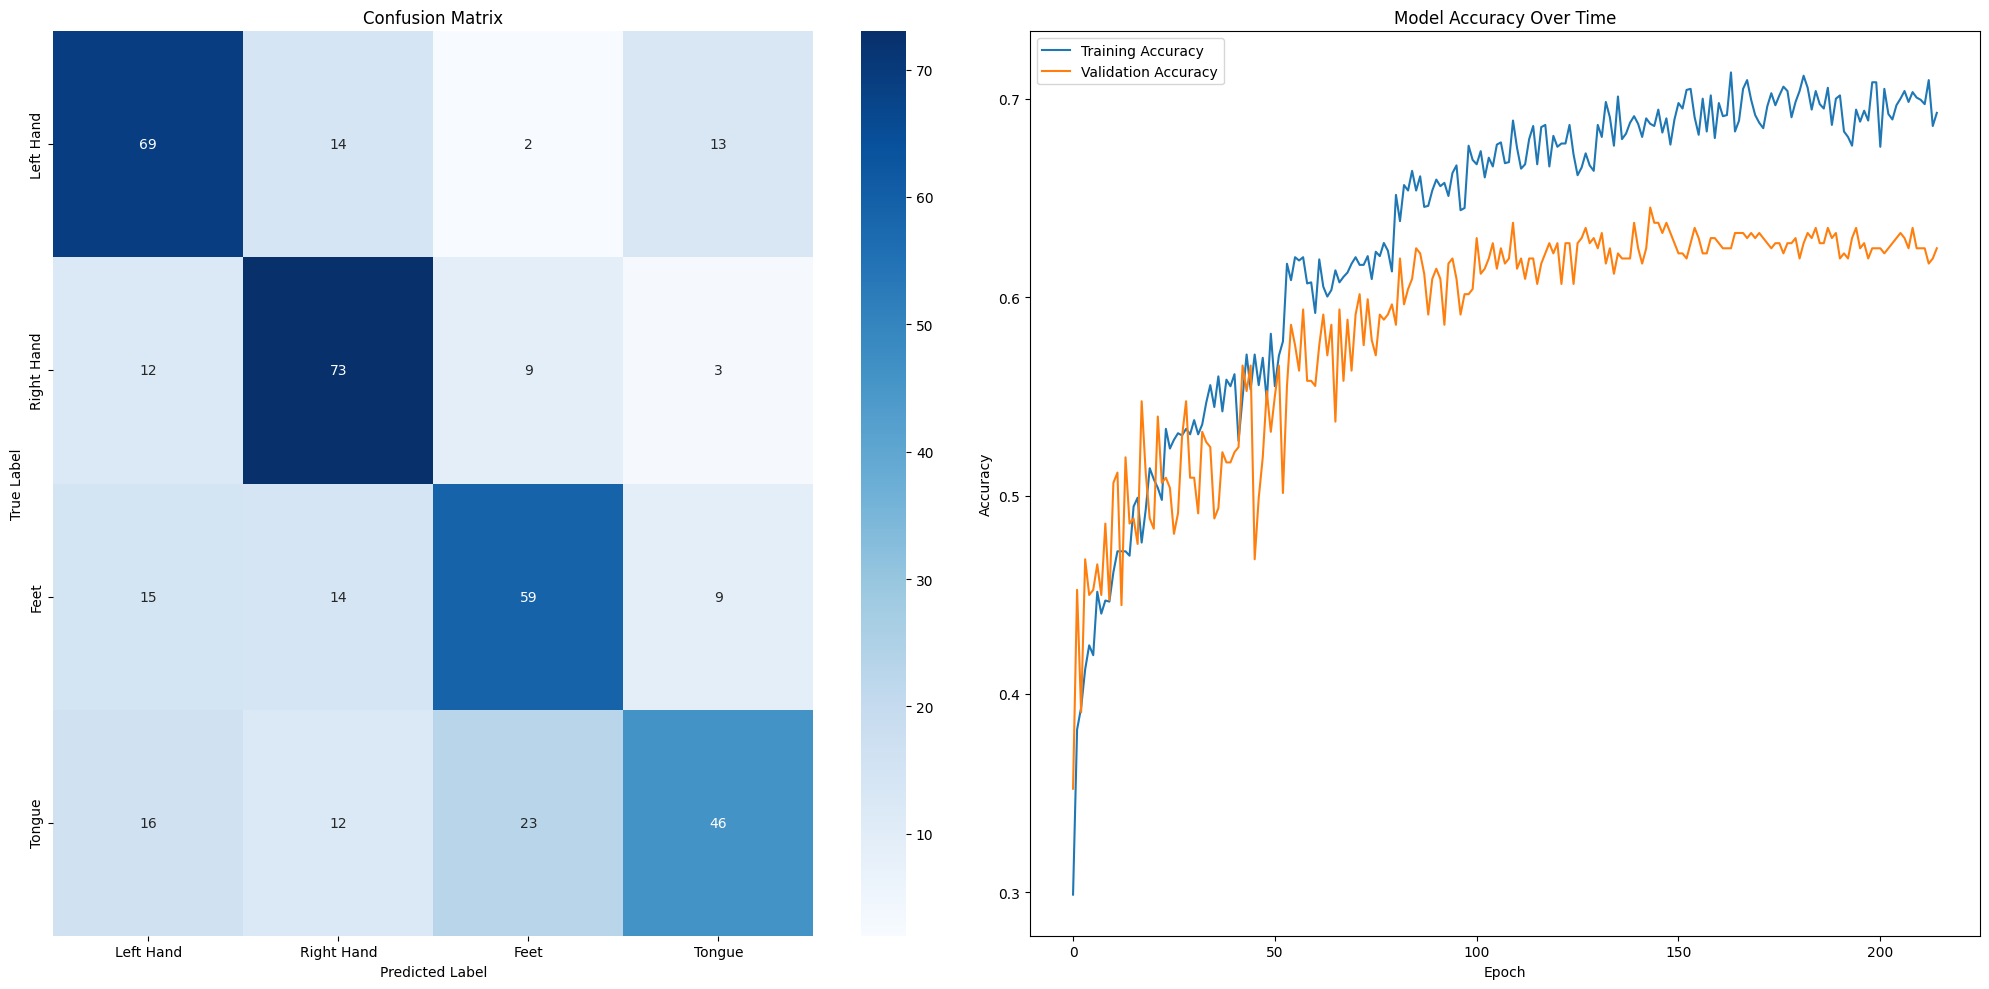


=== Classification Report ===
              precision    recall  f1-score   support

   Left Hand       0.62      0.70      0.66        98
  Right Hand       0.65      0.75      0.70        97
        Feet       0.63      0.61      0.62        97
      Tongue       0.65      0.47      0.55        97

    accuracy                           0.63       389
   macro avg       0.64      0.63      0.63       389
weighted avg       0.64      0.63      0.63       389



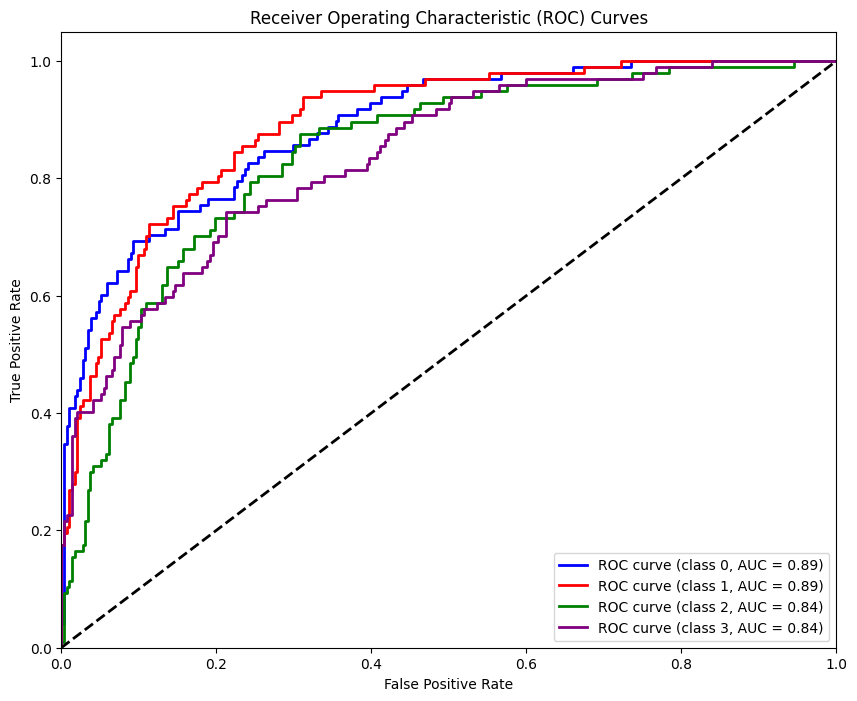


=== Additional Metrics ===
Model Accuracy: 0.6350
Model Loss: 0.8854
Overall ROC AUC: 0.8644

=== Per-Class Accuracy ===
Left Hand: 0.7041
Right Hand: 0.7526
Feet: 0.6082
Tongue: 0.4742


In [51]:
# Visualization of model performance metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Generate predictions if not already done
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Create figure with subplots
plt.figure(figsize=(20, 10))

# 1. Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Left Hand', 'Right Hand', 'Feet', 'Tongue'],
            yticklabels=['Left Hand', 'Right Hand', 'Feet', 'Tongue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 2. Training History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Print detailed classification metrics
print("\n=== Classification Report ===")
print(classification_report(y_true_classes, y_pred_classes, 
                          target_names=['Left Hand', 'Right Hand', 'Feet', 'Tongue']))

# Calculate and print per-class ROC AUC
n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {i}, AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Print additional metrics
print("\n=== Additional Metrics ===")
print(f"Model Accuracy: {model.evaluate(X_test, y_test_cat, verbose=0)[1]:.4f}")
print(f"Model Loss: {model.evaluate(X_test, y_test_cat, verbose=0)[0]:.4f}")
print(f"Overall ROC AUC: {auc_score:.4f}")

# Calculate per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\n=== Per-Class Accuracy ===")
for i, acc in enumerate(['Left Hand', 'Right Hand', 'Feet', 'Tongue']):
    print(f"{acc}: {per_class_accuracy[i]:.4f}")